In [284]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
DATA_PATH = '../data/data'
data_names = os.listdir(DATA_PATH)
datas = {}
for data_name in data_names:
    datas[data_name.split('.')[0]] = pd.read_csv(DATA_PATH+'/'+data_name, dtype={'c': 'string', 'd': 'string'})

/usr/local/anaconda3/envs/ai/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print(datas['battery_temp'])

                name                 time Battery_status battery_status  \
0       battery_temp  1601834069000000000       Charging            NaN   
1       battery_temp  1601834092000000000       Charging            NaN   
2       battery_temp  1601834115000000000       Charging            NaN   
3       battery_temp  1601834138000000000       Charging            NaN   
4       battery_temp  1601834161000000000       Charging            NaN   
...              ...                  ...            ...            ...   
104887  battery_temp  1605093840000000000            NaN           Full   
104888  battery_temp  1605093854000000000            NaN           Full   
104889  battery_temp  1605093869000000000            NaN           Full   
104890  battery_temp  1605093883000000000            NaN           Full   
104891  battery_temp  1605093897000000000            NaN           Full   

       manufacturer     os                              uuid  value  
0               SWD  macos  1

In [4]:
formated_datas = []
for data in datas:
    np_a = datas[data].to_numpy()
    for line in np_a:
        formated_datas.append(line)

In [5]:
df = datas['charge_full']
for serie in datas:
    print(serie)
    df = pd.concat([df,datas[serie]])

charge_full
mean_fans_rpm
current_now
voltage_min_design
n_running_threads
load_average_5
cpu_speed
load_average_1
voltage_now
cycle_count
battery_temp
cpu_temp
swap_load
fans_rpm
ram_load
number_of_fans
capacity
charge_full_design
charge_now
load_average_15


In [6]:
values = df.values

In [7]:
charge_full = datas['charge_full'][['os','value']].values

In [8]:
print(charge_full)
print(charge_full[:,1].mean())

[['macos' 4089]
 ['linux' 2760]
 ['macos' 4089]
 ...
 ['macos' 4014]
 ['macos' 4014]
 ['macos' 4014]]
3667.8220231839023


In [9]:
mac_os_index = np.where(charge_full[:,0] == 'macos')
print(mac_os_index)
print(charge_full[mac_os_index][:,1].mean())
print(np.unique(charge_full[mac_os_index][:,1]))

(array([     0,      2,      3, ..., 196944, 196945, 196946]),)
4269.414169996939
[3881 3909 3912 3920 3927 3929 3930 3931 3932 3933 3934 3935 3936 3937
 3938 3939 3940 3941 3942 3943 3944 3945 3946 3947 3948 3949 3950 3951
 3952 3953 3954 3955 3956 3957 3958 3959 3960 3961 3962 3963 3964 3965
 3966 3967 3968 3969 3970 3971 3972 3973 3974 3975 3976 3977 3978 3979
 3980 3981 3982 3983 3984 3985 3986 3987 3988 3989 3990 3991 3992 3993
 3994 3995 3996 3997 3998 3999 4000 4001 4002 4003 4004 4005 4006 4007
 4008 4009 4010 4011 4012 4013 4014 4015 4016 4017 4018 4019 4020 4021
 4022 4023 4024 4025 4026 4027 4028 4029 4030 4031 4032 4033 4034 4035
 4036 4037 4038 4039 4040 4041 4042 4043 4044 4045 4046 4047 4048 4049
 4050 4051 4052 4053 4054 4055 4056 4057 4058 4059 4060 4061 4062 4063
 4064 4065 4066 4067 4068 4069 4070 4071 4072 4073 4074 4075 4076 4077
 4078 4079 4080 4081 4082 4083 4084 4085 4086 4087 4088 4089 4090 4091
 4092 4093 4094 4095 4096 4097 4098 4099 4100 4101 4102 4103 4104 

In [10]:
current_now = datas['current_now'][['battery_status','manufacturer','os','value']].values

In [11]:
print(current_now)

[[nan 'SWD' 'macos' 2053]
 ['Full' 'BYD' 'linux' 1]
 [nan 'SWD' 'macos' 2053]
 ...
 ['Full' 'SWD' 'macos' 0]
 ['Full' 'SWD' 'macos' 0]
 ['Full' 'SWD' 'macos' 1]]


# Current mean 

In [12]:
mac_os_index = np.where(current_now[:,2] == 'macos')
#print(mac_os_index)
discharging_mac_os = np.where(current_now[mac_os_index][:,0] == 'Discharging')
#print(discharging_mac_os)
current_now_discharging_mac_os = current_now[discharging_mac_os][:,3]
print("Current now mean on macOs during discharing: ",current_now_discharging_mac_os.mean())

Current now mean on macOs during discharing:  611.6792071767413


In [13]:
linux_index = np.where(current_now[:,2] == 'linux')
#print(linux_index)
discharging_linux = np.where(current_now[linux_index][:,0] == 'Discharging')
#print(discharging_linux)
current_now_discharging_linux = current_now[discharging_linux][:,3]
print("Current now mean on linux during discharing: ", current_now_discharging_linux.mean())

Current now mean on linux during discharing:  461.4936023870935


# Remarque


Remarque 1: Les ordinateurs sous macos ont + consommés que les ordinateurs linux durant les cycles de décharge. La question serait-donc de savoir si ces ordinateurs ont possédés le même type d\'usage durant ces cycles de décharge

# Boxplot current now

In [14]:
current_now = datas['current_now'][['battery_status','manufacturer','os','value']]
#current_now_discharging_index = np.where(current_now[:,0] == 'Discharging')
#current_now_discharging = current_now[current_now_discharging_index]
#print(current_now_discharging)
print(current_now)

       battery_status manufacturer     os  value
0                 NaN          SWD  macos   2053
1                Full          BYD  linux      1
2                 NaN          SWD  macos   2053
3                 NaN          SWD  macos   1863
4                 NaN          SWD  macos   1863
...               ...          ...    ...    ...
196935           Full          SWD  macos      0
196936           Full          SWD  macos      0
196937           Full          SWD  macos      0
196938           Full          SWD  macos      0
196939           Full          SWD  macos      1

[196940 rows x 4 columns]


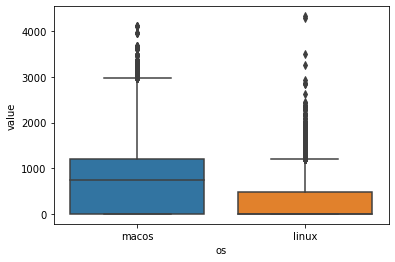

In [15]:
ax = sns.boxplot(x='os', y='value', data=current_now)

# Remarque 

Remarque 1: D'une manière générale, les pcs macos ont plus consommés que les pcs linux, tout cycle de charge/décharge confondu

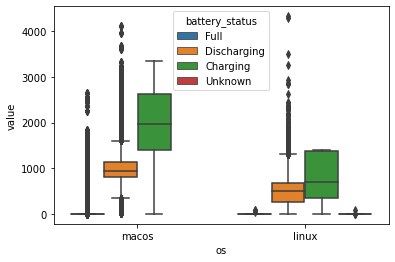

In [16]:
ax = sns.boxplot(x='os', y='value', hue='battery_status', data=current_now)

# Remarque
Lorsque l'on détaille les cycles, tout cycle confondue, on retrouve encore que les macs ont plus consommés que les linux.

Détaillons un cas, par exemple celui du cycle de décharge.

In [24]:
current_now = datas['current_now'][['battery_status','manufacturer','os','value']].values

In [25]:
mac_os_index = np.where(current_now[:,2] == 'macos')
#print(mac_os_index)
discharging_mac_os = np.where(current_now[mac_os_index][:,0] == 'Discharging')
#print(discharging_mac_os)
current_now_discharging_mac_os = current_now[discharging_mac_os][:,3]
print("Current now mean on macOs during discharing: ",current_now_discharging_mac_os.mean())

Current now mean on macOs during discharing:  611.6792071767413


In [26]:
linux_index = np.where(current_now[:,2] == 'linux')
#print(linux_index)
discharging_linux = np.where(current_now[linux_index][:,0] == 'Discharging')
#print(discharging_linux)
current_now_discharging_linux = current_now[discharging_linux][:,3]
print("Current now mean on linux during discharing: ", current_now_discharging_linux.mean())

Current now mean on linux during discharing:  461.4936023870935


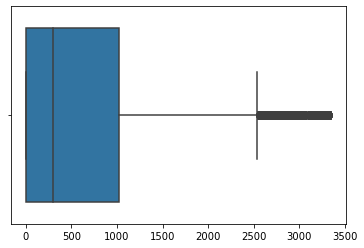

In [29]:
ax = sns.boxplot(x=current_now_discharging_mac_os)

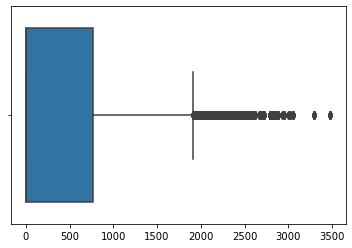

In [30]:
ax = sns.boxplot(x=current_now_discharging_linux)

# Remarque 
Mais où se trouve la mediane ? -> explication avec le premier quartile

# Quand est-il de l'usage? 
Essayer de croiser les données car trop galère sinon

In [164]:
mean_fans_rpm = datas['mean_fans_rpm'][['time', 'os', 'battery_status', 'Battery_status', 'manufacturer', 'uuid', 'value']]
n_running_threads = datas['n_running_threads'][['time', 'os', 'battery_status', 'Battery_status', 'manufacturer', 'uuid', 'value']]
load_average_1 = datas['load_average_1'][['time', 'os', 'battery_status', 'Battery_status', 'manufacturer', 'uuid', 'value']]
load_average_5 = datas['load_average_5'][['time', 'os', 'battery_status', 'Battery_status', 'manufacturer', 'uuid', 'value']]
load_average_15 = datas['load_average_15'][['time', 'os', 'battery_status', 'Battery_status', 'manufacturer', 'uuid', 'value']]
cpu_speed = datas['cpu_speed'][['time', 'os', 'battery_status', 'manufacturer', 'uuid', 'value']]
battery_temp = datas['battery_temp'][['time', 'os', 'battery_status', 'Battery_status', 'manufacturer', 'uuid', 'value']]
cpu_temp = datas['cpu_temp'][['time', 'os', 'battery_status', 'Battery_status', 'manufacturer', 'uuid', 'value']]
ram_load = datas['ram_load'][['time', 'os', 'battery_status', 'manufacturer', 'uuid', 'value']]

In [165]:
print("mean fan rpm size: ",mean_fans_rpm.shape)
print("n running threads size: ", n_running_threads.shape)
print("load average 1 size: ", load_average_1.shape)
print("load average 5 size: ", load_average_5.shape)
print("load average 15 size: ", load_average_15.shape)
print("cpu speed size: ", cpu_speed.shape)
print("battery temp size: ", battery_temp.shape)
print("cpu temp size: ", cpu_temp.shape)
print("ram load size:", ram_load.shape)

mean fan rpm size:  (104900, 7)
n running threads size:  (196950, 7)
load average 1 size:  (194549, 7)
load average 5 size:  (194549, 7)
load average 15 size:  (194549, 7)
cpu speed size:  (76086, 6)
battery temp size:  (104892, 7)
cpu temp size:  (180984, 7)
ram load size: (76086, 6)


In [166]:
new_df = pd.merge(load_average_1,
                  load_average_5,
                  on=['time',
                      'os',
                      'battery_status',
                      'Battery_status',
                      'uuid',
                      'manufacturer'],
                 suffixes=('_la1', '_la5'))
print(load_average_1.shape)
print(load_average_5.shape)

(194549, 7)
(194549, 7)


# Croisement des données OS MIX

In [328]:
values = ['time', 'os', 'battery_status', 'manufacturer', 'uuid', 'value']
new_df = datas['charge_full'][values]
ex_dataset = 'charge_full'
dataset = 'mean_fans_rpm'
datasets = ['charge_full',
            'n_running_threads',
            'load_average_1',
            'load_average_5',
            'load_average_15',
            'charge_full_design',
            'charge_now',
            'current_now',
            'voltage_now',
            'cpu_temp']
for dataset in datasets[1:]:
    new_df = pd.merge(new_df,
                     datas[dataset][values],
                     on=['time',
                     'os',
                     'battery_status',
                     'uuid',
                     'manufacturer'],
                     suffixes=('_'+ex_dataset,'_'+dataset))
    ex_dataset=dataset
print(new_df)

                       time     os battery_status manufacturer  \
0       1601834069000000000  macos            NaN          SWD   
1       1601834071000000000  linux           Full          BYD   
2       1601834092000000000  macos            NaN          SWD   
3       1601834115000000000  macos            NaN          SWD   
4       1601834138000000000  macos            NaN          SWD   
...                     ...    ...            ...          ...   
178571  1605093854000000000  macos           Full          SWD   
178572  1605093869000000000  macos           Full          SWD   
178573  1605093883000000000  macos           Full          SWD   
178574  1605093897000000000  macos           Full          SWD   
178575  1605093912000000000  macos           Full          SWD   

                                    uuid  value_charge_full  \
0       13370f11455f4f36a0680b9725189375               4089   
1       5fbc9f85604740eb85dbf9dbd495de67               2760   
2       13370f1145

In [329]:
print("Init shape before cross :", charge_full.shape)
print("New df shape: ",new_df.shape)

Init shape before cross : (196947, 2)
New df shape:  (178576, 15)


# MIX OS

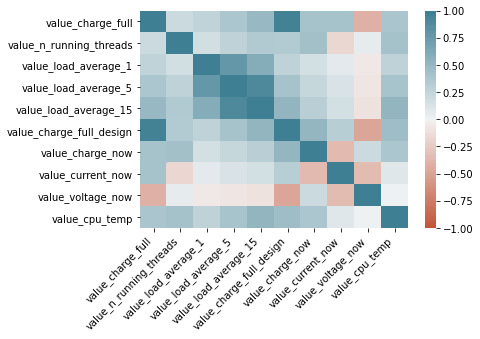

In [332]:
datasets_df = ['value_charge_full',
            'value_n_running_threads',
            'value_load_average_1',
            'value_load_average_5',
            'value_load_average_15',
            'value_charge_full_design',
            'value_charge_now',
            'value_current_now',
            'value_voltage_now',
            'value_cpu_temp']
correlation_matrix = new_df[datasets_df].corr()
ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# CROISEMENT DES DONNEES MAC OS

In [333]:
values = ['time', 'os', 'battery_status', 'manufacturer', 'uuid', 'value']
new_df = datas['charge_full'][values]
ex_dataset = 'charge_full'
dataset = 'mean_fans_rpm'
datasets = ['charge_full',
            'n_running_threads',
            'load_average_1',
            'load_average_5',
            'load_average_15',
            'charge_full_design',
            'charge_now',
            'current_now',
            'voltage_now',
            'cpu_temp',
            'mean_fans_rpm',
            'battery_temp',
            'cycle_count',
            'number_of_fans']
for dataset in datasets[1:]:
    new_df = pd.merge(new_df,
                     datas[dataset][values],
                     on=['time',
                     'os',
                     'battery_status',
                     'uuid',
                     'manufacturer'],
                     suffixes=('_'+ex_dataset,'_'+dataset))
    ex_dataset=dataset
print(new_df)

                       time     os battery_status manufacturer  \
0       1601834069000000000  macos            NaN          SWD   
1       1601834092000000000  macos            NaN          SWD   
2       1601834115000000000  macos            NaN          SWD   
3       1601834138000000000  macos            NaN          SWD   
4       1601834161000000000  macos            NaN          SWD   
...                     ...    ...            ...          ...   
102490  1605093840000000000  macos           Full          SWD   
102491  1605093854000000000  macos           Full          SWD   
102492  1605093869000000000  macos           Full          SWD   
102493  1605093883000000000  macos           Full          SWD   
102494  1605093897000000000  macos           Full          SWD   

                                    uuid  value_charge_full  \
0       13370f11455f4f36a0680b9725189375               4089   
1       13370f11455f4f36a0680b9725189375               4089   
2       13370f1145

In [335]:
print("Init shape before cross :", charge_full.shape)
print("New df shape: ",new_df.shape)

Init shape before cross : (196947, 2)
New df shape:  (102495, 19)


# MAC OS 

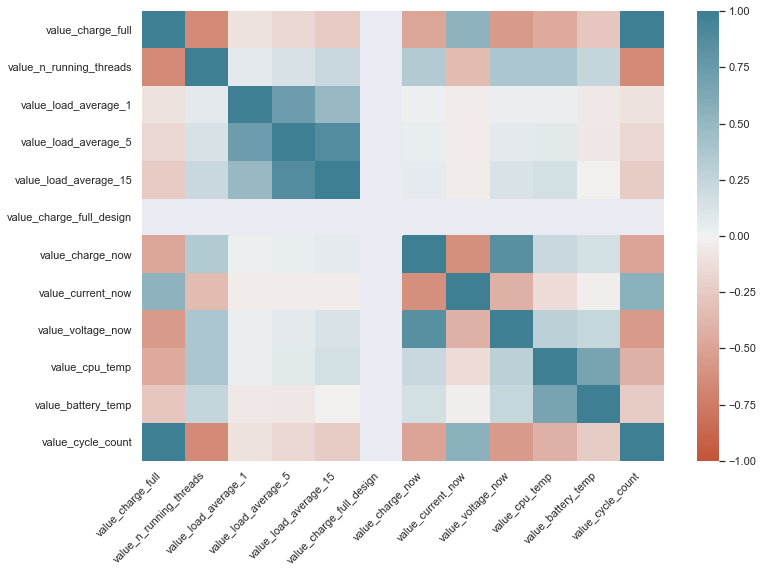

In [344]:
datasets_df = ['value_charge_full',
            'value_n_running_threads',
            'value_load_average_1',
            'value_load_average_5',
            'value_load_average_15',
            'value_charge_full_design',
            'value_charge_now',
            'value_current_now',
            'value_voltage_now',
            'value_cpu_temp',
            'value_battery_temp',
            'value_cycle_count']
correlation_matrix = new_df[datasets_df].corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Il y a donc une perte de 20 0000 données dû au Battery status devenu battery_status
D'autres petites pertes ont aussi lieu

In [237]:
discharging_index = np.where(new_df['battery_status'] == 'Discharging')
discharging = new_df.values[discharging_index]

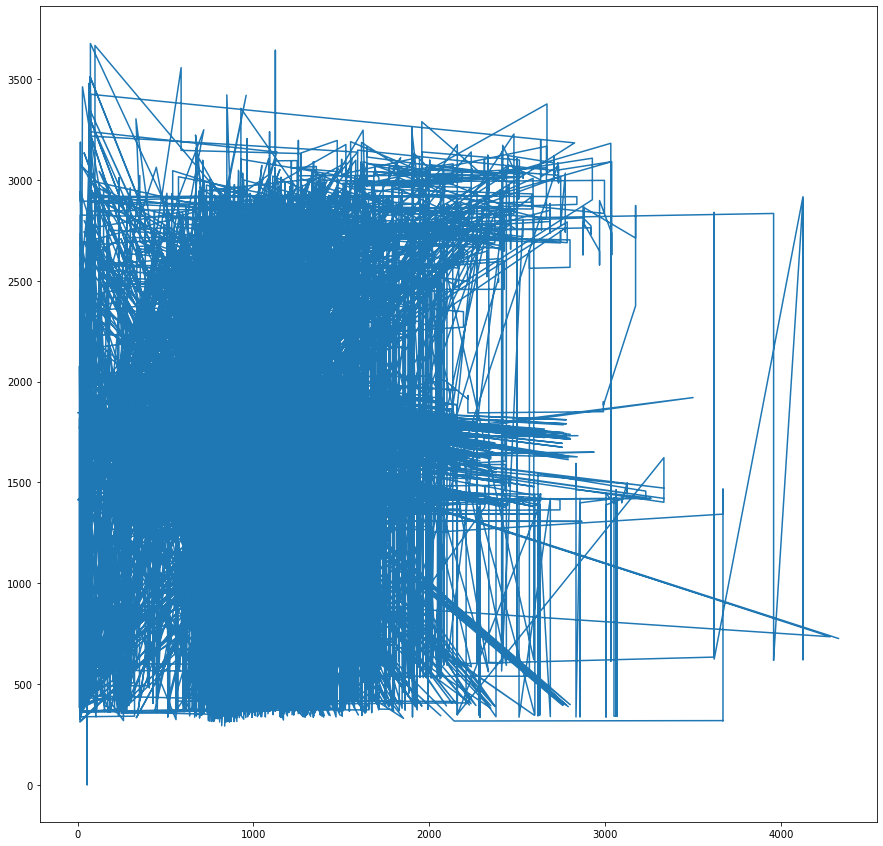

In [265]:
current_now_discharging = new_df['value_current_now'].values[discharging_index]
n_r_t_discharging = new_df['value_n_running_threads'].values[discharging_index]

fig = plt.figure(1,figsize=(15,15))
plt.plot(current_now_discharging, n_r_t_discharging)
plt.show(fig)

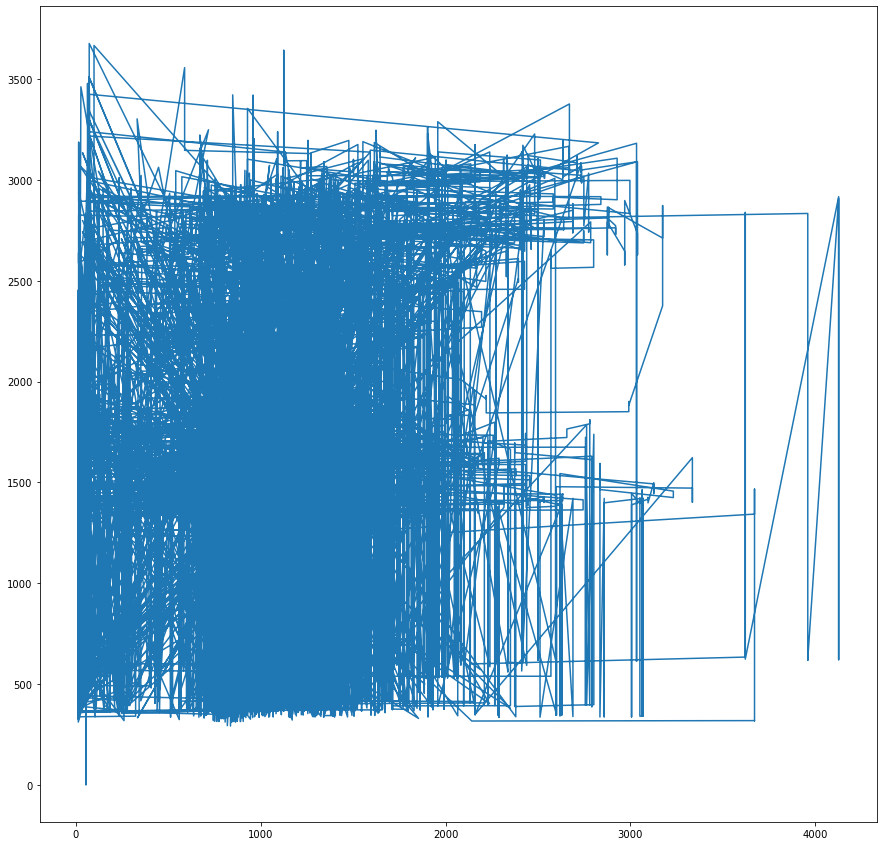

In [241]:
discharging_index_mac_os = np.where((new_df['battery_status'] == 'Discharging') & (new_df['os'] == 'macos'))
current_now_discharging_mac_os = new_df['value_current_now'].values[discharging_index_mac_os]
n_r_t_discharging_mac_os = new_df['value_n_running_threads'].values[discharging_index_mac_os]

fig = plt.figure(1,figsize=(15,15))
plt.plot(current_now_discharging_mac_os, n_r_t_discharging_mac_os)
plt.show()

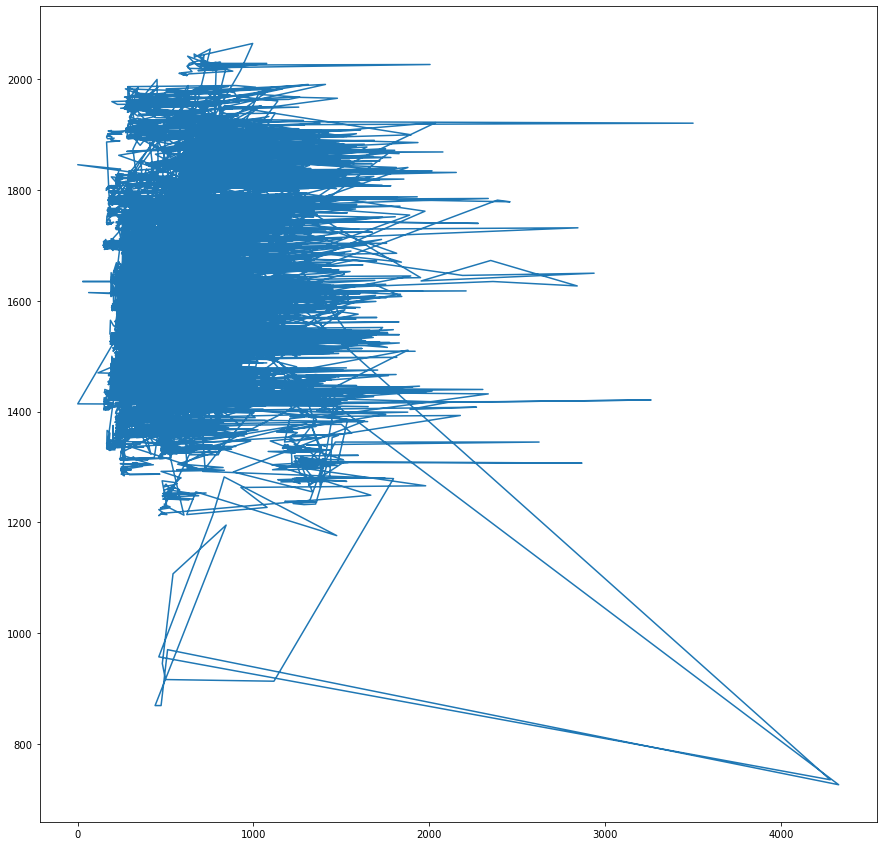

In [242]:
discharging_index_linux = np.where((new_df['battery_status'] == 'Discharging') & (new_df['os'] == 'linux'))
current_now_discharging_linux = new_df['value_current_now'].values[discharging_index_linux]
n_r_t_discharging_linux = new_df['value_n_running_threads'].values[discharging_index_linux]

fig = plt.figure(1,figsize=(15,15))
plt.plot(current_now_discharging_linux, n_r_t_discharging_linux)
plt.show()